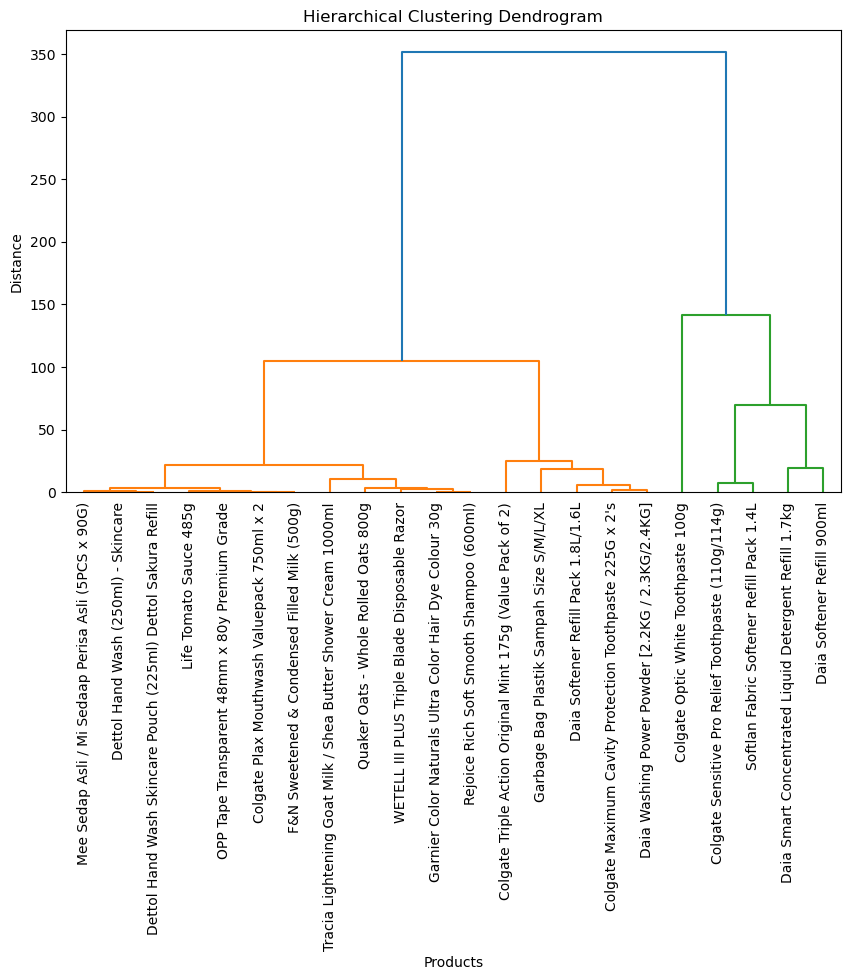

High Demand:
1. Colgate Optic White Toothpaste 100g

Low Demand:
1. Colgate Maximum Cavity Protection Toothpaste 225G x 2's
2. Colgate Plax Mouthwash Valuepack 750ml x 2
3. Colgate Sensitive Pro Relief Toothpaste (110g/114g)
4. Colgate Triple Action Original Mint 175g (Value Pack of 2)
5. Daia Smart Concentrated Liquid Detergent Refill 1.7kg
6. Daia Softener Refill 900ml
7. Daia Softener Refill Pack 1.8L/1.6L
8. Daia Washing Power Powder [2.2KG / 2.3KG/2.4KG]
9. Dettol Hand Wash (250ml) - Skincare
10. Dettol Hand Wash Skincare Pouch (225ml) Dettol Sakura Refill
11. F&N Sweetened & Condensed Filled Milk (500g)
12. Garbage Bag Plastik Sampah Size S/M/L/XL
13. Garnier Color Naturals Ultra Color Hair Dye Colour 30g
14. Life Tomato Sauce 485g
15. Mee Sedap Asli / Mi Sedaap Perisa Asli (5PCS x 90G)
16. OPP Tape Transparent 48mm x 80y Premium Grade
17. Quaker Oats - Whole Rolled Oats 800g
18. Rejoice Rich Soft Smooth Shampoo (600ml)
19. Softlan Fabric Softener Refill Pack 1.4L
20. Tracia Ligh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data from the CSV file
file_path = '22_product_quantities_random_restock_limited_no_stock.csv'  # Replace with your file path
product_data = pd.read_csv(file_path)

# Calculate stock volume (sales quantity) and restock frequency for each product
sales_volumes = []
restock_frequencies = []

# Loop through each product to calculate sales volume and restock frequency
for _, row in product_data.iterrows():
    # Calculate daily changes in stock levels
    daily_changes = pd.to_numeric(row[1:].diff(), errors='coerce').fillna(0)
    
    # Sales volume: Sum of all decreases in stock levels (sales)
    sales_volume = -daily_changes[daily_changes < 0].sum()
    sales_volumes.append(sales_volume)
    
    # Restock frequency: Count of all increases in stock levels (restocks)
    restock_frequency = (daily_changes > 0).sum()
    restock_frequencies.append(restock_frequency)

# Add calculated features to the product data
product_data['Sales_Volume'] = sales_volumes
product_data['Restock_Frequency'] = restock_frequencies

# Prepare the data for clustering
X = product_data[['Sales_Volume', 'Restock_Frequency']].values

# Perform Hierarchical Clustering
Z = linkage(X, method='ward')  # 'ward' minimizes the variance within clusters

# Create a dendrogram to visualize the clusters
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=product_data['Product'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Products')
plt.ylabel('Distance')
plt.show()
